In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

import os
import unicodedata
import re
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.model_selection

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import prepare as prep
import explore as ex

In [2]:
#df = pd.read_csv('almost_there.csv', index_col=0)

In [3]:
#df = df.reset_index()

In [4]:
#df.nunique()

In [5]:
#df['title'].value_counts()

In [6]:
#df = df.drop_duplicates(subset='title')

In [7]:
#df

In [8]:
#df = df.drop(columns='book_tag')

In [9]:
#def get_data():
#    '''
#    Will pull the current data from the 'almost_there' csv file, and prep it for deeper cleaning.
#    '''
#    df = pd.read_csv('almost_there.csv', index_col=0)
#    df = df.drop_duplicates(subset='title')
    
#    save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']
#    sub = df[df['length'].isna()]
#    sub1 = sub[sub['title'].isin(save)]
#    df = df.dropna(subset='length')
#    df = pd.concat([df, sub1], axis=0)
    
#    df = df.dropna(subset='summary')
#    df = df.dropna(subset='year_published')
    
#    df = df.reset_index()
#    df = df.drop(columns=['index', 'book_tag'])
    
#    df['summary'] = df['summary'].astype('string')
#    df['title'] = df['title'].astype('string')
#    df['author'] = df['author'].astype('string')
#    df['genre'] = df['genre'].astype('string')
#    df['length'] = df['length'].astype('float')

#    return df

In [10]:
df = prep.get_data('all_books.csv')

In [11]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN
...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[]
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[]


In [12]:
df.isna().sum()

title                   0
summary                 0
year_published          0
author                  0
review_count            0
number_of_ratings       0
length                  4
genre                   0
rating                  0
reviews              2026
dtype: int64

In [13]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
dtype: object

In [14]:
#df = df.dropna(subset='summary')

In [15]:
#df[df['year_published'].isna()]

In [16]:
#df = df.dropna(subset='year_published')

In [17]:
prep.clean_article(df, 'title')

In [18]:
prep.clean_article(df, 'summary')

In [19]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
dtype: object

In [20]:
#df = df.drop(columns='clean_titles')

In [21]:
df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)

In [22]:
prep.clean_article(df1, 'Book')

In [23]:
ser = df1['cleaned_Book']

In [24]:
prep.creat_tar(df, ser)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller


In [25]:
#save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']

In [26]:
#sub = df[df['length'].isna()]

In [27]:
#sub1 = sub[sub['title'].isin(save)]

In [28]:
#df = df.dropna(subset='length')

In [29]:
#df = pd.concat([df, sub1], axis=0)

In [30]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
target                object
dtype: object

In [31]:
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)

In [32]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...


In [33]:
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)

In [34]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404


In [35]:
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

In [36]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655,very positive
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


In [37]:
ham_counts = pd.Series(ham_words).value_counts()


NameError: name 'ham_words' is not defined

In [ ]:
spam_counts.head()

In [ ]:
word_freq = pd.concat([ham_counts, spam_counts, all_counts], axis=1)


In [ ]:
word_freq.isna().sum()

In [ ]:
word_freq.columns = ['ham', 'spam', 'all']
word_freq.fillna(0, inplace=True)
word_freq.head()

In [ ]:
word_freq.sort_values('all', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
word_freq['pct_spam'] = word_freq['spam'] / word_freq['all'] * 100
word_freq[word_freq['ham'] > 200].sort_values('pct_ham', ascending=False)

In [ ]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))
top_ham_bigrams = ham_bigrams.value_counts().head(10)


In [ ]:
#Plot
top_ham_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring ham bigrams')
plt.show()

# exploration

In [66]:
#def prep_data(filename):
    
#    df = prep.get_data(filename)
    
#    prep.clean_article(df, 'title')
#    prep.clean_article(df, 'summary')
    
#    df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)
#    prep.clean_article(df1, 'Book')
#    ser = df1['cleaned_Book']
    
#    prep.creat_tar(df, ser)
    
#    df.loc[[3806], ['length']] = 320
#    df.loc[[3807], ['length']] = 407
#    df.loc[[3808], ['length']] = 368
#    df.loc[[3809], ['length']] = 920
    
#    df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)
#    df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)
#    df['sentiment'] = df['compound'].apply(prep.get_sentiment)
    
#    return df
    

In [3]:
df = prep.prep_data('all_books.csv')

In [4]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",False,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,False,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",False,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,False,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",False,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",False,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655,very positive
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,320.0,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,True,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,407.0,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,True,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,368.0,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,True,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


In [111]:
# genre_counts = df['genre'].value_counts()

In [14]:
# df['genre'].value_counts()

In [15]:
# genre_counts

In [16]:
# df['target'].value_counts()

In [114]:
# genres_to_remove = genre_counts[genre_counts < 8].index
# remove the rows with those genres "filtering"
# df = df[~df['genre'].isin(genres_to_remove)]

In [59]:
#df.loc[[3806], ['length']] = 320

In [61]:
#df.loc[[3807], ['length']] = 407

In [62]:
#df.loc[[3808], ['length']] = 368

In [63]:
#df.loc[[3809], ['length']] = 920

In [17]:
#df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [21]:
#df['successful'] = df['successful'].astype(bool)

In [5]:
df.isna().sum()

title                    0
summary                  0
year_published           0
author                   0
review_count             0
number_of_ratings        0
length                   0
genre                    0
rating                   0
reviews               1953
cleaned_title            0
cleaned_summary          0
successful               0
lemmatized_summary       0
neg                      0
neutral                  0
pos                      0
compound                 0
sentiment                0
dtype: int64

In [6]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['successful'])
    return train, test

In [7]:
train, test = split(df)

In [8]:
train

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
169,Adulting: How to Become a Grown-up in 468 Easy...,If you graduated from college but still feel l...,2013,Kelly Williams Brown,1543,13705,273.0,Nonfiction,3.70,[],adulting how to become a grownup in 468 easyis...,if you graduated from college but still feel l...,False,graduate college still feel like student wear ...,0.046,0.762,0.192,0.9915,very positive
1519,One Day,15th July 1988: Emma and Dexter meet for the f...,2009,David Nicholls,18888,313843,435.0,Fiction,3.81,NaN,one day,15th july 1988 emma and dexter meet for the fi...,False,july emma dexter meet first time night graduat...,0.000,1.000,0.000,0.0000,neutral
3558,First Man In: Leading from the Front,No one is born a leader. But through sheer det...,2018,Ant Middleton,689,12104,321.0,Nonfiction,4.02,[],first man in leading from the front,no one is born a leader. but through sheer det...,False,one born leader sheer determination confront l...,0.105,0.700,0.194,0.9866,very positive
5,¡Hola Papi!: How to Come Out in a Walmart Park...,From popular LGBTQ advice columnist and writer...,2021,John Paul Brammer,986,6863,214.0,Memoir,4.06,[],hola papi how to come out in a walmart parking...,from popular lgbtq advice columnist and writer...,False,popular lgbtq advice columnist writer john pau...,0.045,0.743,0.212,0.9938,very positive
197,All That is Red,If you could choose a world without loneliness...,2012,Anna Caltabiano,15,36,164.0,Fantasy,3.81,NaN,all that is red,if you could choose a world without loneliness...,False,could choose world without loneliness without ...,0.123,0.700,0.177,0.8173,very positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,Never Go With Your Gut,"Avoid terrible advice, cognitive biases, and p...",2019,Gleb Tsipursky,87,207,224.0,Business,4.17,NaN,never go with your gut,"avoid terrible advice, cognitive biases, and p...",False,avoid terrible advice cognitive bias poor deci...,0.272,0.643,0.085,-0.9926,very negative
1032,In Defense of Food,"Michael Pollan's last book, The Omnivore's Dil...",2008,Michael Pollan,8417,112955,205.0,Nonfiction,4.07,NaN,in defense of food,"michael pollan's last book, the omnivore's dil...",False,michael pollan last omnivore dilemma launch na...,0.013,0.849,0.138,0.9209,very positive
3360,In Defense of Witches: The Legacy of the Witch...,Mona Chollet's In Defense of Witches is a “bri...,2018,Mona Chollet,1167,11494,320.0,Nonfiction,4.20,[],in defense of witches the legacy of the witch ...,mona chollet's in defense of witches is a bril...,False,mona chollet defense witch brilliant welldocum...,0.215,0.737,0.048,-0.9947,very negative
360,Blackamoores,Do we imagine English history as a book with w...,2013,Onyeka,26,98,463.0,History,4.31,NaN,blackamoores,do we imagine english history as a book with w...,False,imagine english history white page black lette...,0.053,0.875,0.073,0.6428,very positive


In [9]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

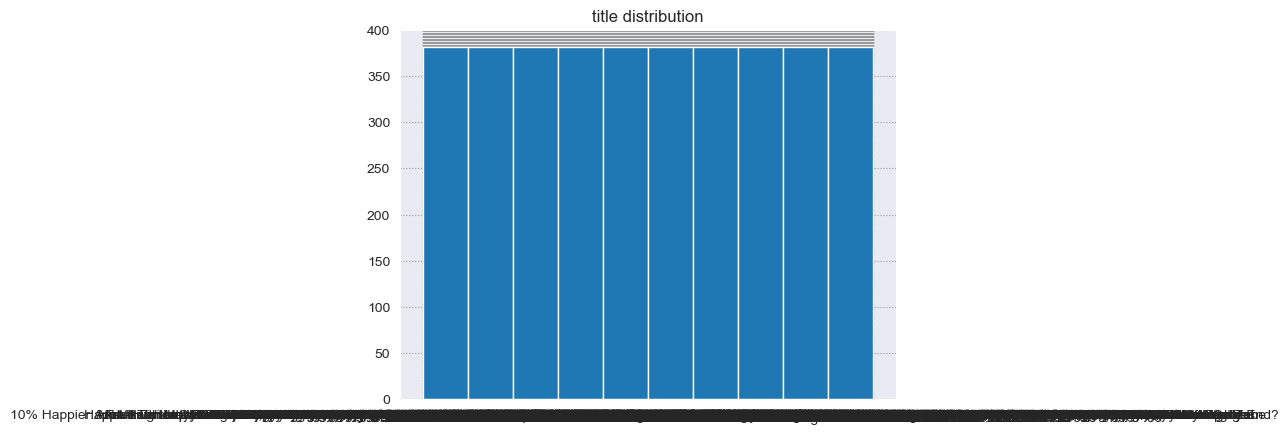

/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12519 (\N{KATAKANA LETTER SMALL YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PRO

ValueError: 
The "Mightiest" of Earth's Mightiest Heroes is back! Ace pilot. Legendary Avenger. One hundred percent pure bad-@$$. Carol Danvers has a new name, a new mission - and all the power she needs to make her own life a living hell. As the new Captain Marvel, Carol is forging from a challenge from her past! It's a firefight in the sky as the Banshee Squadron debut - but who are the Prowlers, and where has Carol seen them before? And how does secret NASA training program Mercury 13 fit in? Witness Captain Marvel in blazing battlefield action that just may change the course of history! Avengers Time Travel Protocols: engage! Collecting: Captain Marvel 1-6
                                                                                                                 ^
Expected end of text, found '$'  (at char 113), (line:1, col:114)

<Figure size 640x480 with 1 Axes>

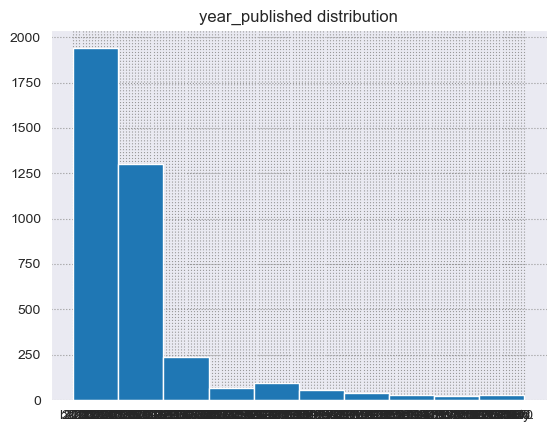

In [ ]:
for col in train.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [10]:
train.dtypes

title                  string
summary                string
year_published         object
author                 string
review_count            int64
number_of_ratings       int64
length                float64
genre                  string
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [17]:
genre_counts = df['genre'].value_counts()

In [20]:
genres = genre_counts.head(13)

In [24]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3276,In Her Shadow,Isabel’s life seemed perfect. Successful busin...,2018,Mark Edwards,721,10381,358.0,Mystery,4.01,[],in her shadow,isabels life seemed perfect. successful busine...,unsuccessful,isabels life seem perfect successful business ...,0.170,0.635,0.194,0.4094,positive
3271,Animals in Translation: Using the Mysteries of...,Why would a cow lick a tractor? Why are collie...,2004,Temple Grandin,1146,9259,358.0,Nonfiction,4.14,[],animals in translation using the mysteries of ...,why would a cow lick a tractor why are collies...,unsuccessful,would cow lick tractor collie get dumber dolph...,0.071,0.820,0.109,0.9034,very positive
1863,Stiff,"Okay, you're thinking: ""This must be some kin...",2003,Mary Roach,16229,204660,303.0,Nonfiction,4.06,NaN,stiff,"okay, you're thinking \nthis must be some kind...",unsuccessful,okay thinking must kind joke humorous cadaver ...,0.073,0.788,0.139,0.9344,very positive
73,A History of the Present Illness,A History of the Present Illness takes readers...,2013,Louise Aronson,74,503,259.0,Short Stories,3.77,NaN,a history of the present illness,a history of the present illness takes readers...,unsuccessful,history present illness take reader overlook l...,0.083,0.850,0.067,-0.4703,negative
145,A Touch of Dead,Meet Sookie Stackhouse!Sookie Stackhouse is ev...,2009,Charlaine Harris,1961,47917,208.0,Vampires,3.84,NaN,a touch of dead,meet sookie stackhousesookie stackhouse is eve...,unsuccessful,meet sookie stackhousesookie stackhouse everyb...,0.109,0.700,0.191,0.8652,very positive


In [44]:
df.dtypes

title                  string
summary                string
year_published         object
author                 string
review_count            int64
number_of_ratings       int64
length                float64
genre                  string
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [ ]:
# Rotating X-axis labels
# plt.xticks(rotation = 25)

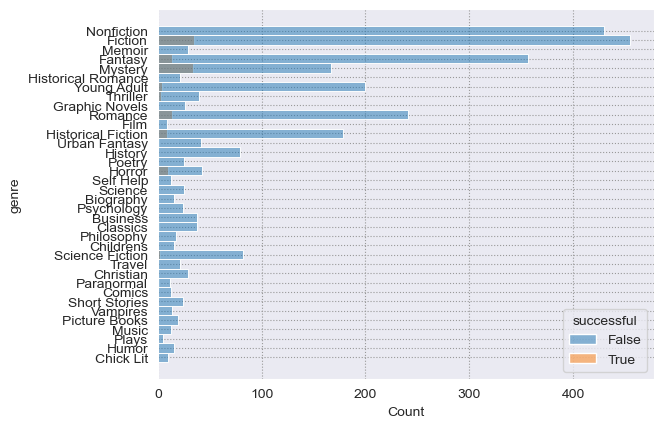

In [43]:
sns.histplot(data=train, y='genre', hue='successful')
#plt.xticks(rotation = 80)
plt.show()